# Exam question examples

In [49]:
import numpy as np
import cv2
from comvis import Pi, PiInv
import matplotlib.pyplot as plt

## Question 1

A camera has focal length 800, principal point (900, 580), $\alpha=1$, $\beta=0$, and radial distortion parameters $k_{3} = 0.03$, $k_{5} = 0.04$.
What is the camera matrix?

In [2]:
f = 800
alpha = 1
beta = 0
deltax = 900
deltay = 580

\begin{equation}
    K = \begin{bmatrix}
        f & \beta*f & \delta x \\
        0 & alpha*f & \delta y \\
        0 & 0 & 1 \\
        \end{bmatrix}
\end{equation}
It has 12-degrees of freedom. As far as I can see, the distortion does not influence the definition of the camera matrix, but they can be used to undistort the image.

In [3]:
K = np.array([[f, beta*f, deltax],
              [0, alpha*f, deltay],
              [0, 0, 1]])

In [4]:
K

array([[800,   0, 900],
       [  0, 800, 580],
       [  0,   0,   1]])

The answer is option (C).

## Question 2
How many degrees of freedom does a homography matrix have?

Projection of points on a plane:

$$
    q = \underbrace{\mathcal{P}\begin{bmatrix} \mathbf{A} & \mathbf{B} & \mathbf{C} \\ 0 & 0 & 1 \end{bmatrix}}_{\mathbf{H}} \begin{bmatrix} a \\ b \\ 1 \end{bmatrix}
$$


It is scale invariant! If two cameras are at the same point, we can use the homography to relate their pixels. Furthermore, the homography is 3x3 dimensional (9 numbers). However, as we just mentioned it is scale invariant meaning that we loose one degree of freedom. In conclusion, it has 8 degrees of freedom. Furthermore, we need four pairs of points to determine the homography, given that each pair of point imposes two constraints (x, y).

The answer is option (h).

## Question 3

A camera has focal length 350, and principal point (700, 390.0). The camera has the rotation: `cv2.Rodrigues(np.array([0.1, -0.2, -0.1]))[0]` and the translation `np.array([[0.03], 0.06, -0.02])`. A 3D point in the world coordinate system has the coordinates `np.array([0.35, 0.17, 1.01])` what is the projection of this point to the camera's image plane?

In [6]:
R = cv2.Rodrigues(np.array([0.1, -0.2, -0.1]))[0]
T = np.array([[0.03], [0.06], [-0.02]])
Q = np.array([0.35, 0.17, 1.01])

In [7]:
def camera_matrix(f, alpha, beta, deltax, deltay):

    K  = np.array([[f, beta*f, deltax],
              [0, alpha*f, deltay],
              [0, 0, 1]])
    return K

In [32]:
K = camera_matrix(350, 1, 0, 700, 390)
P = K @ np.hstack((R, T))

We use the following equation to determine projection to the camera's image plane:

$$ 
p = \underbrace{K[R|t]}_{\mathcal{P}}Q
$$

We have to make the world coordinate into homogenous before we can calculate the projection. After having determined the projection we need to convert it into standard coordinates:

In [37]:
Pi(P @ PiInv(Q.reshape((-1,1))))

array([[760.41876032],
       [423.38000917]])

Option (a) is correct.

## Question 4
Harris corner detector. For a small region of the image, we have computed the elements of the smoothed Hessian matrix/structure tensor. They are available in harris.npy and also presented here:
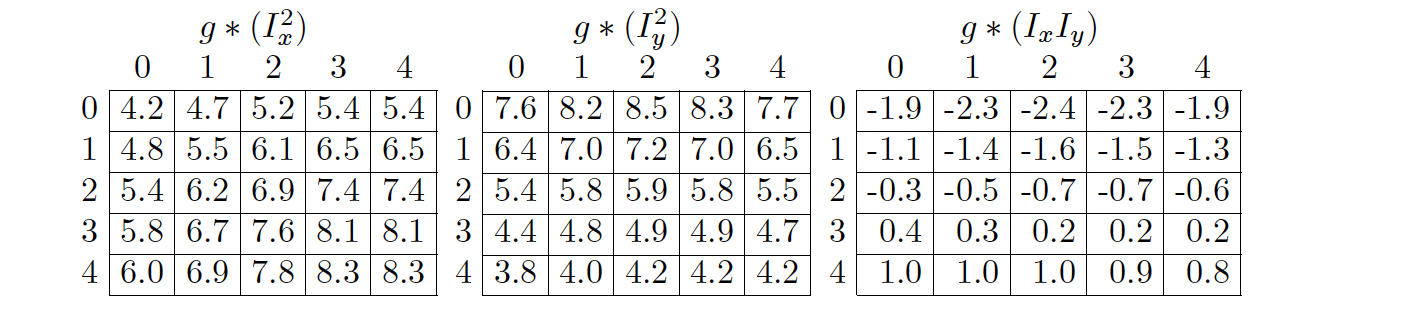

Let $k=0.06$. Does the Harris corner detector find any corners in the image? Corners are specified as (row index, column index).

In [45]:
Ixx, Iyy, Ixy = np.load("materials/harris.npy", allow_pickle=True).item().values()

In [46]:
Ixx, Iyy, Ixy

(array([[4.2, 4.7, 5.2, 5.4, 5.4],
        [4.8, 5.5, 6.1, 6.5, 6.5],
        [5.4, 6.2, 6.9, 7.4, 7.4],
        [5.8, 6.7, 7.6, 8.1, 8.1],
        [6. , 6.9, 7.8, 8.3, 8.3]]),
 array([[7.6, 8.2, 8.5, 8.3, 7.7],
        [6.4, 7. , 7.2, 7. , 6.5],
        [5.4, 5.8, 5.9, 5.8, 5.5],
        [4.4, 4.8, 4.9, 4.9, 4.7],
        [3.8, 4. , 4.2, 4.2, 4.2]]),
 array([[-1.9, -2.3, -2.4, -2.3, -1.9],
        [-1.1, -1.4, -1.6, -1.5, -1.3],
        [-0.3, -0.5, -0.7, -0.7, -0.6],
        [ 0.4,  0.3,  0.2,  0.2,  0.2],
        [ 1. ,  1. ,  1. ,  0.9,  0.8]]))

Let us try to determine the harris corners by using the harris measure: (See week 7 for more)

In [48]:
k = 0.06
detC = Ixx*Iyy - Ixy**2
traceC = Ixx + Iyy
r = detC - k*traceC**2

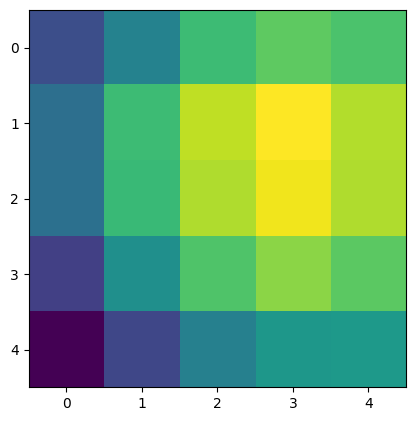

In [51]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.imshow(r)
plt.show()

There is implied one corner in the above plot, it is not completely clear though unfortunately. But the answer is a corner at (1,3) which is option (h).